# PREVENCIÓN DE IMPAGOS EN PRÉSTAMOS BANCARIOS MEDIANTE TÉCNICAS DE APRENDIZAJE AUTOMÁTICO

- **AUTOR**: Fátima Illana Guerra                                        

## DATA SET: GERMAN CREDIT DATA

Primero importamos las librerías necesarias y la base de datos. Para ello tendremos que instalar la siguiente librería: *pip install ucimlrepo*

In [1]:
# Datos
from ucimlrepo import fetch_ucirepo

# Preprocesado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Estudio de datos
import seaborn as sns

# Separación y análisis de modelos
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

# K-NN
from sklearn.neighbors import KNeighborsClassifier

# Árboles de Decisión
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Regresión Logística
from sklearn.linear_model import LogisticRegression

# SVM (Support Vector Machines)
from sklearn import svm


La base de datos que utilizaremos se llama 'Statlog (German Credit Data)' y consiste en un conjunto de datos que tiene como objetivo determinar si una persona es apta o no para recibir un préstamo, concretamente en la economía alemana. La base de datos pertenece al respositorio UCI, con ID = 144, por lo que lo importaremos directamente del respositorio a través del paquete que ofrece.

In [2]:
statlog_german_credit_data = fetch_ucirepo(id=144) 

Al cargar los datos, en formato Data Frame de Pandas, podemos separarlos directamente entre las características que utilizaremos como predictores y la variable objetivo que queremos predecir.

In [3]:
X1 = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

Ahora imprimiremos la cabeza del Data Frame correspondiente a las variables predictoras para estudiar las características de los datos proporcionados:

In [4]:
X1.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


Sabemos, por la documentación de los datos, que existe una versión alternativa con la versión numérica de los datos. Sin embargo, como dicha versión no está documentada ni cuenta con explicaciones del procesado de los datos, utilizaremos el dataset original y lo preprocesaremos. 

## PREPROCESADO DE DATOS

En seguida vemos que contamos con 20 variables distintas con valores cuyo significado no es representativo. Por ello, miramos la documentación y estudiamos cada una:

1. Cuenta de cheques - Ordinal - 4 valores posibles: [A14 < A11 < A12 < A13]
2. Duración del préstamo - Numérica - Unidad: meses
3. Historial de préstamos - Ordinal - 5 valores posibles: [A34 < A33 < A32 < A31 < A30]
4. Propósito del crédito - Categórica - 11 valores posibles
5. Cantidad del préstamo - Numérica - Unidad: Deutsche Mark
6. Cuenta de Ahorros - Ordinal - 5 valores posibles: [A65 < A61 < A62 < A63 < A64]
7. Tiempo Laboral - Ordinal - 5 valores posibles: [A71 < A72 < A73 < A74 < A75]
8. Tasa Cuota Mensual/Ingresos - Numérica - Unidad: porcentaje
9. Estado personal y sexo - Categórica - 5 valores posibles
10. Presencia de segundo deudor/garante - Categórica - 3 valores posibles
11. Antigüedad en hogar - Numérica - Unidad: años
12. Propiedades - Categórica - 4 valores posibles
13. Edad - Numérica - Unidad: años
14. Presencia de otros pagos a plazos - Categórica - 3 valores posibles
15. Propiedad del hogar - Categórica - 3 valores posibles
16. Número de créditos en este banco - Numérica - Unidad: enteros
17. Estado de profesión - Ordinal - 4 valores posibles: [A171 < A172 < A173 < A174]
18. Número de personas dependientes del préstamo - Numérica - Unidades: enteros
19. Estado del registro del número de teléfono - Binaria [0, 1]
20. Trabajador extranjero - Binaria [0, 1]

En total tenemos:
- 5 variables ordinales
- 7 variables numéricas
- 8 variables categóricas, de entre las cuales 2 son binarias

No obstante nos damos cuenta de que, pese a que la mayoría de variables son importantes para la predicción del modelo, hay una en concreto que es irrelevante: el registro del núemro de teléfono. Esta característica no nos porporciona ninguna información relevante acerca de la aptitud de una persona para recibir un préstamo, por lo que decidimos eliminarla. Además, la variable acerca de la propiead del hogar puede llegar a ser reduntante, al estar incluída en la varaible de propiedades. Por ello, y para simplificar el proceso, decidimos eliminarla también.

In [5]:
X2 = X1.copy()
X2 = X2.drop('Attribute19', axis=1)
X2 = X2.drop('Attribute15', axis=1)
X2.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute16,Attribute17,Attribute18,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,2,A173,1,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,1,A173,1,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,1,A172,2,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,1,A173,2,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,2,A173,2,A201


Además vemos que tenemos una variable que involucra el sexo de la persona y su situación personal. Esta concretamente es de interés ya que debemos evitar la existencia de posibles sesgos en nuestra predicción provocada por la irregularidad en los datos. Por ello estudiamos la distribución de las distintas categorías posibles en esta variable:

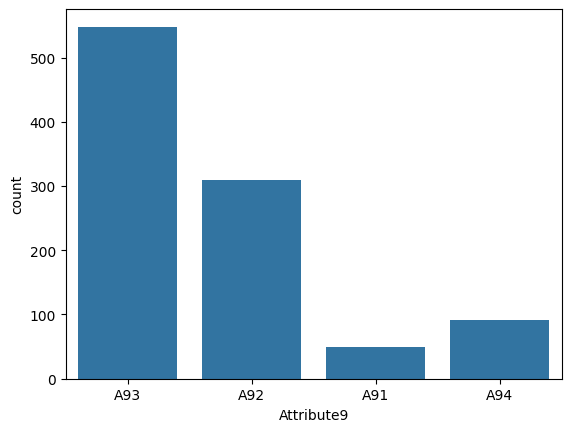

In [6]:
sns.countplot(data=X2, x='Attribute9')
plt.show()

Vemos que la distrbución es completamente irregular, con una mayoría de las observaciones teniendo el valor A93. Para evitar sesgos procedemos a eliminar la variable.

In [7]:
X3 = X2.copy()
X3 = X3.drop('Attribute9', axis=1)
X3.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute16,Attribute17,Attribute18,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A101,4,A121,67,A143,2,A173,1,A201
1,A12,48,A32,A43,5951,A61,A73,2,A101,2,A121,22,A143,1,A173,1,A201
2,A14,12,A34,A46,2096,A61,A74,2,A101,3,A121,49,A143,1,A172,2,A201
3,A11,42,A32,A42,7882,A61,A74,2,A103,4,A122,45,A143,1,A173,2,A201
4,A11,24,A33,A40,4870,A61,A73,3,A101,4,A124,53,A143,2,A173,2,A201


Ahora, para que el contexto de las variables sea más significativo, cambiamos el nombre de las columnas a etiquetas más relacionadas semánticamente:

In [8]:
X3.columns = ['Cuenta', 'Duracion', 'Historial', 'Proposito', 'Cantidad', 'Ahorros', 'AntiguedadLaboral', 
              'TasaPrestamo', 'Involucrados', 'AntiguedadHogar', 'Propiedades', 'Edad', 'OtrosPagos', 
              'NCreditos', 'Profesion', 'NDependencias', 'Extranjero']
X3.head()

,Cuenta,Duracion,Historial,Proposito,Cantidad,Ahorros,AntiguedadLaboral,TasaPrestamo,Involucrados,AntiguedadHogar,Propiedades,Edad,OtrosPagos,NCreditos,Profesion,NDependencias,Extranjero
0,A11,6,A34,A43,1169,A65,A75,4,A101,4,A121,67,A143,2,A173,1,A201
1,A12,48,A32,A43,5951,A61,A73,2,A101,2,A121,22,A143,1,A173,1,A201
2,A14,12,A34,A46,2096,A61,A74,2,A101,3,A121,49,A143,1,A172,2,A201
3,A11,42,A32,A42,7882,A61,A74,2,A103,4,A122,45,A143,1,A173,2,A201
4,A11,24,A33,A40,4870,A61,A73,3,A101,4,A124,53,A143,2,A173,2,A201


Sabemos también que la base de datos no cuenta con valores nulos, tal y como se especifica en la descripción de los datos. No obstante, lo comprobamos.

In [9]:
nulos_por_columna = pd.isnull(X3).sum()
nulos_por_columna

Cuenta               0
Duracion             0
Historial            0
Proposito            0
Cantidad             0
Ahorros              0
AntiguedadLaboral    0
TasaPrestamo         0
Involucrados         0
AntiguedadHogar      0
Propiedades          0
Edad                 0
OtrosPagos           0
NCreditos            0
Profesion            0
NDependencias        0
Extranjero           0
dtype: int64

Efectivamente no hay valores nulos por lo que no es necesario imputar los datos. 

Después, debemos convertir las variables ordinales a valores numéricos. Utilizaremos OrdinalEncoder. Aprovechamos, también, a convertir a binario {0, 1} la variable 'Extranjero'.

In [10]:
X4 = X3.copy()

# Variable Cuenta: A14 < A11 < A12 < A13
enc1 = OrdinalEncoder(categories=[['A14', 'A11', 'A12', 'A13']])
X4['Cuenta'] = enc1.fit_transform(X4[['Cuenta']])

# Variable Historial: A34 < A33 < A32 < A31 < A30
enc2 = OrdinalEncoder(categories=[['A34', 'A33', 'A32', 'A31', 'A30']])
X4['Historial'] = enc2.fit_transform(X4[['Historial']])

# Variable Ahorros: A65 < A61 < A62 < A63 < A64
enc3 = OrdinalEncoder(categories=[['A65', 'A61', 'A62', 'A63', 'A64']])
X4['Ahorros'] = enc3.fit_transform(X4[['Ahorros']])

# Variable AntiguedadLaboral: A71 < A72 < A73 < A74 < A75
enc4 = OrdinalEncoder(categories=[['A71', 'A72', 'A73', 'A74', 'A75']])
X4['AntiguedadLaboral'] = enc4.fit_transform(X4[['AntiguedadLaboral']])

# Variable Profesion: A171 < A172 < A173 < A174
enc5 = OrdinalEncoder(categories=[['A171', 'A172', 'A173', 'A174']])
X4['Profesion'] = enc5.fit_transform(X4[['Profesion']])

# Variable Extranjero: A202 < A201 [1 -> 'Si', 0 -> 'No']
enc6 = OrdinalEncoder(categories=[['A202', 'A201']])
X4['Extranjero'] = enc6.fit_transform(X4[['Extranjero']])

X4.head()

,Cuenta,Duracion,Historial,Proposito,Cantidad,Ahorros,AntiguedadLaboral,TasaPrestamo,Involucrados,AntiguedadHogar,Propiedades,Edad,OtrosPagos,NCreditos,Profesion,NDependencias,Extranjero
0,1.0,6,0.0,A43,1169,0.0,4.0,4,A101,4,A121,67,A143,2,2.0,1,1.0
1,2.0,48,2.0,A43,5951,1.0,2.0,2,A101,2,A121,22,A143,1,2.0,1,1.0
2,0.0,12,0.0,A46,2096,1.0,3.0,2,A101,3,A121,49,A143,1,1.0,2,1.0
3,1.0,42,2.0,A42,7882,1.0,3.0,2,A103,4,A122,45,A143,1,2.0,2,1.0
4,1.0,24,1.0,A40,4870,1.0,2.0,3,A101,4,A124,53,A143,2,2.0,2,1.0


También debemos pasar las variables categóricas a valores numéricos. Teniendo en cuenta que tenemos 4 variables de este tipo, y que 'Propositos' tiene un número de categorías posibles demasiado alto para usar One-Hot Encoder, emplearemos esta técnica para, únicamente, 3 variables: 'Involucrados', 'Propiedades' y 'OtrosPagos'.

In [11]:
X5 = X4.copy()

# Definir las columnas categóricas que deseas codificar y las que deseamos dejar intactas
categoricas_a_codificar = ['Involucrados', 'Propiedades', 'OtrosPagos']
categorias_sin_codificar = ['Cuenta', 'Duracion', 'Historial', 'Proposito', 'Cantidad', 'Ahorros', 'AntiguedadLaboral', 
                            'TasaPrestamo', 'AntiguedadHogar', 'Edad', 'NCreditos', 'Profesion', 'NDependencias', 'Extranjero']

# Definir el transformador
transformador = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categoricas_a_codificar)
    ],
    remainder='passthrough'  # Mantener las demás columnas sin cambios
)

# Aplicar el transformador al DataFrame
df_transformado = transformador.fit_transform(X5)

# Crear un nuevo DataFrame con las columnas transformadas y las no transformadas
columnas_transformadas = categoricas_a_codificar + categorias_sin_codificar
nombres_columnas = (
    transformador.named_transformers_['onehot'].get_feature_names_out(categoricas_a_codificar).tolist() + categorias_sin_codificar
)
X5 = pd.DataFrame(df_transformado, columns=nombres_columnas)

# Mostrar el DataFrame transformado
X5.head()


,Involucrados_A101,Involucrados_A102,Involucrados_A103,Propiedades_A121,Propiedades_A122,Propiedades_A123,Propiedades_A124,OtrosPagos_A141,OtrosPagos_A142,OtrosPagos_A143,...,Cantidad,Ahorros,AntiguedadLaboral,TasaPrestamo,AntiguedadHogar,Edad,NCreditos,Profesion,NDependencias,Extranjero
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1169,0.0,4.0,4,4,67,2,2.0,1,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5951,1.0,2.0,2,2,22,1,2.0,1,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2096,1.0,3.0,2,3,49,1,1.0,2,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,7882,1.0,3.0,2,4,45,1,2.0,2,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,4870,1.0,2.0,3,4,53,2,2.0,2,1.0


Finalmente, consideraremos la variable 'Proposito' como ordinal para facilitar su codificación. Establecemos el orden según la consideración personal a falta de un especialista a quien consultar la interpretación de los datos utilizados.

In [12]:
X6 = X5.copy()

# Variable Proposito: A410 < A47 < A43 < A42 < A41 < A40 < A44 < A48 < A45 < A46 < A49
enc7 = OrdinalEncoder(categories=[['A410', 'A47', 'A43', 'A42', 'A41', 'A40', 'A44', 'A48', 'A45', 'A46', 'A49']])
X6['Proposito'] = enc7.fit_transform(X6[['Proposito']])

X6['Proposito']

0      2.0
1      2.0
2      9.0
3      3.0
4      5.0
      ... 
995    3.0
996    4.0
997    2.0
998    2.0
999    4.0
Name: Proposito, Length: 1000, dtype: float64

Después, con el objetivo de detectar posibles valores atípicos, representamos los Box-Plots de las variables numéricas:

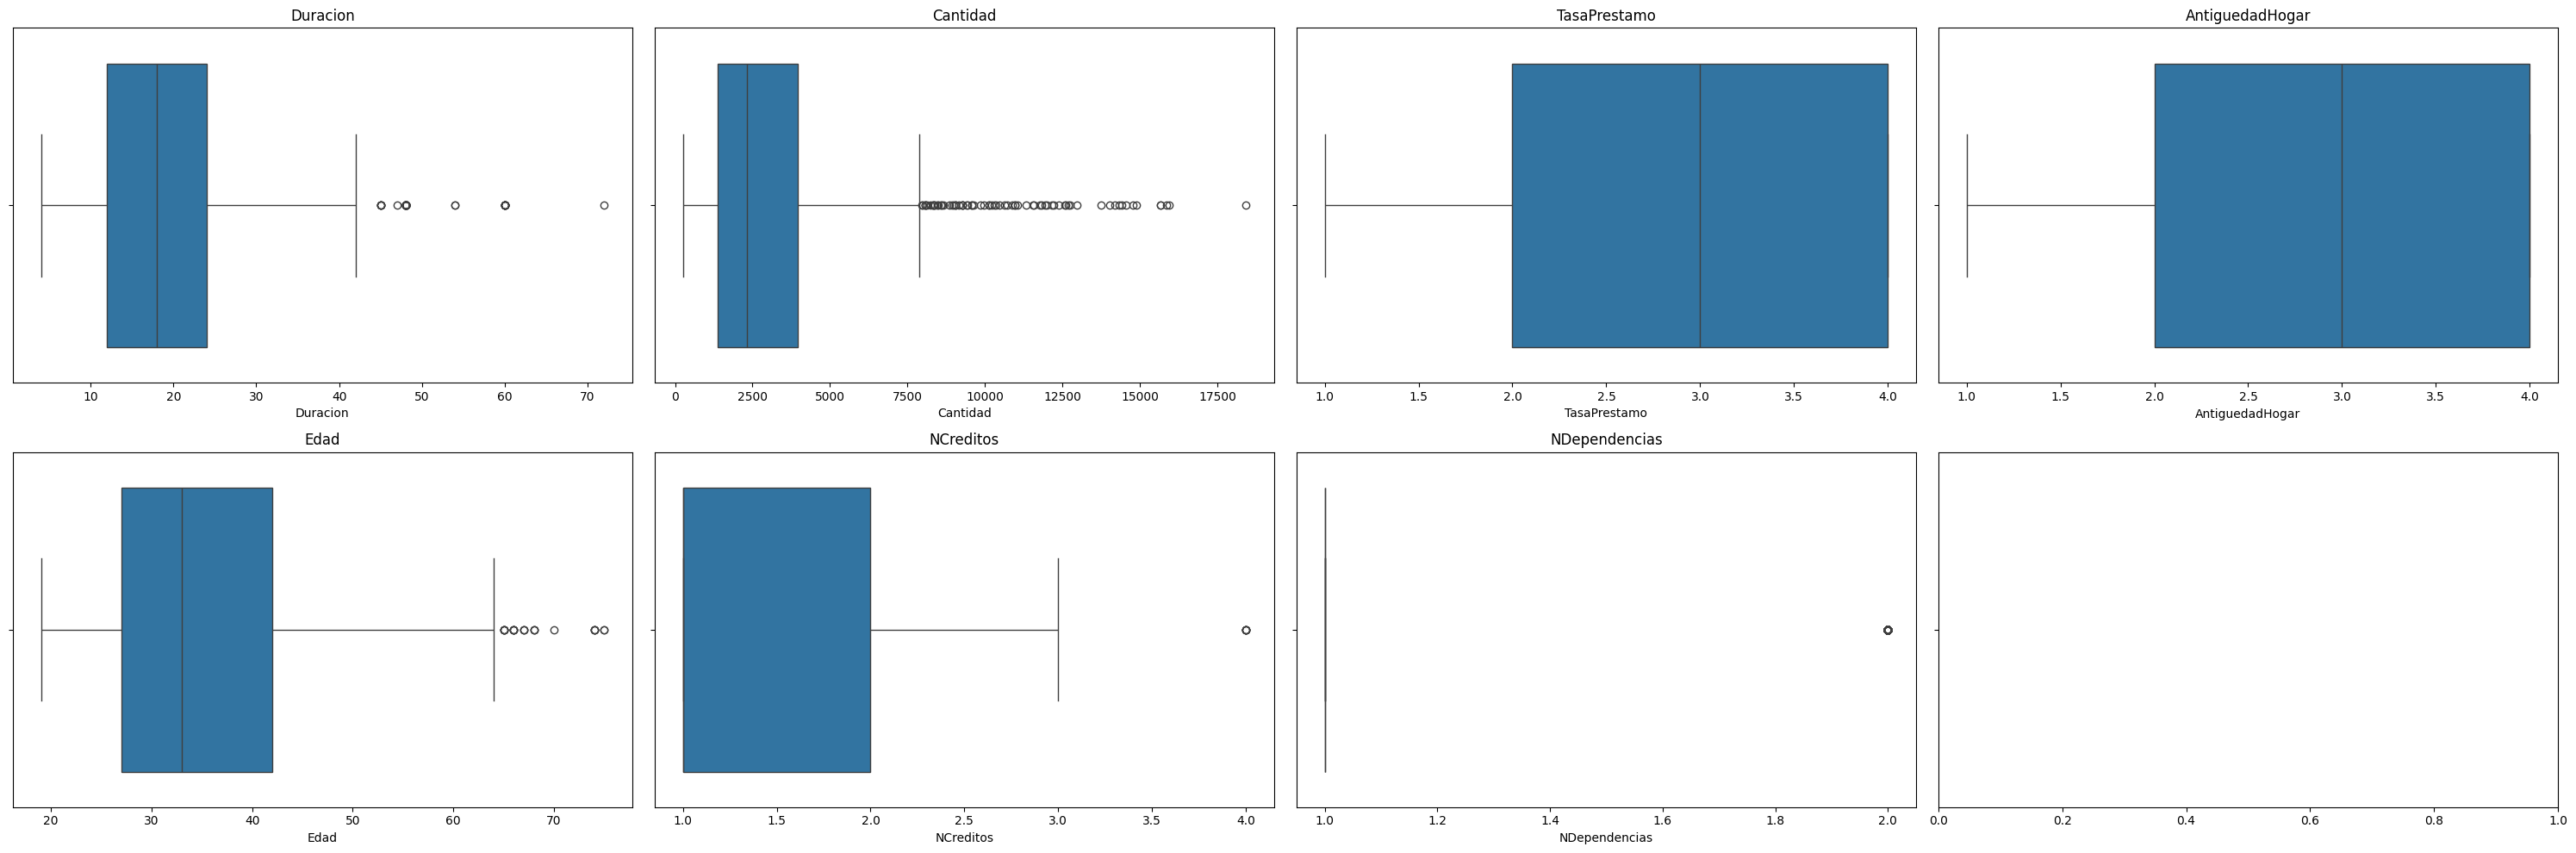

In [13]:
X6 = X6.astype('float64')
X7 = X6[['Duracion', 'Cantidad', 'TasaPrestamo', 'AntiguedadHogar', 'Edad', 'NCreditos', 'NDependencias']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), sharey=True)

# Aplanar la matriz de subplots para facilitar el acceso
axes = axes.flatten()

# Iterar a través de las variables y dibujar boxplots
for i, columna in enumerate(X7.columns):
    sns.boxplot(x=X7[columna], ax=axes[i])
    axes[i].set_title(columna)  # Agregar el nombre de la variable como título

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()


Podemos ver que las variables que más datos atípicos tienen son aquellas cuyas escalas son considerablemente mayores que el resto de variables. Para evitar que éstas tengan un peso mayor al procesar los datos, decidimos escalarlas, utilizando en este caso MinMaxScaler().

In [14]:
X7 = X6.copy()
columnas_a_escalar = ['Duracion', 'Cantidad', 'Edad']
scaler = MinMaxScaler()

# Escalar solo las columnas seleccionadas
X7[columnas_a_escalar] = scaler.fit_transform(X7[columnas_a_escalar])

# Mostrar el DataFrame con las columnas escaladas
X7.head()

,Involucrados_A101,Involucrados_A102,Involucrados_A103,Propiedades_A121,Propiedades_A122,Propiedades_A123,Propiedades_A124,OtrosPagos_A141,OtrosPagos_A142,OtrosPagos_A143,...,Cantidad,Ahorros,AntiguedadLaboral,TasaPrestamo,AntiguedadHogar,Edad,NCreditos,Profesion,NDependencias,Extranjero
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.050567,0.0,4.0,4.0,4.0,0.857143,2.0,2.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.313690,1.0,2.0,2.0,2.0,0.053571,1.0,2.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.101574,1.0,3.0,2.0,3.0,0.535714,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.419941,1.0,3.0,2.0,4.0,0.464286,1.0,2.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.254209,1.0,2.0,3.0,4.0,0.607143,2.0,2.0,2.0,1.0


Tenemos, entonces, los datos listos para ser procesados.

In [15]:
X = X7

## ESTUDIO DE LOS DATOS

No obstante, antes de comenzar el proceso de modelado, sería interesante comprobar el balance del conjunto de datos:

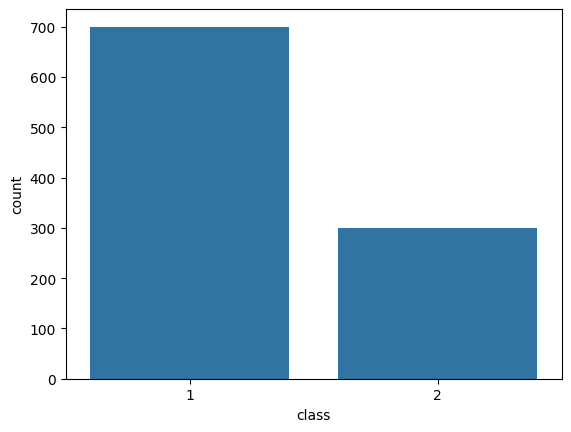

In [16]:
sns.countplot(data=y, x='class')
plt.show()

Como podemos observar se nos plantea un problema de clases desbalanceadas, al haber 700 instancias clasificadas como 'Aptos' frente a las 200 clasificadas como 'No Aptas'. Al tratarse de una diferencia considerable nuestros modelos podrían quedar sesgados a favor de la clase dominante. Para solucionarlo, tendremos que llevar a cabo técnicas como el ajuste de datos, en aquellos algoritmos que lo permitan. 

Además, tenemos concretamente que el 70% de los datos pertenecen a la clase 1 y que el 30% de los datos pertenecen a la clase 2. Por ello sabemos que partimos de una precisión base de 0.7 ya que, si clasificáramos todas las instancias como 'Apto' tendríamos una precisión del 70%. Si nuestros modelos no pueden superar esa precisión realmente no nos estarán proporcionando ninguna información útil en la predicción. 

Por otra parte, estudiaremos ahora los criterios de evaluación y la información que nos proporcionan en nuestro caso de estudio concreto.

- **Precisión**: esta medida determina la proporción de instancias que, clasificadas como positivas, son correctas. En nuestro caso esta métrica es importante ya que si la precisión es pequeña, significa que hay muchos falsos positivos, es decir, mucha gente que no es apta pero se le clasifica de forma que pueda obtener el préstamo. Esto, en relación a la economía del banco, puede llegar a suponer grandes pérdidas por lo que se trata de una métrica muy importante a tener en cuenta.

- **Recall/Recuperación**: esta medida determina la proporción de valores positivos clasificados correctamente. En nuestro caso esta métrica es importante a la hora de atender a los casos donde se clasifica a un potencial cliente como 'No Apto'. Esto puede ser importante si tenemos en cuenta la pérdida de oportunidad para el prestamista.

- **F1-score**: esta métrica combina la precisión y la recuperación. Útil si queremos buscar un equilibrio entre ambas métricas. 

- **Exactitud/Accuracy**: esta medida detemrina la proporción de valores clasificados correctamente, sean positivos o negativos. Mide el rendimiento del modelo y es la métrica en la que nos fijaremos para compararla con la precisión base antes explicada. 

- **Macro avg (Promedio Macro)**: nos proporciona la media de todas las métricas por clase, dando la misma importancia a ambas, sin tener en cuenta el desbalance. En nuestro caso, al tener los datos tan desproporcionados, no nos aporta demasiada información real sobre el rendimiento del modelo. 

- **Weighted avg (Promedio Ponderado)**: es útil cuando hay un desequilibrio entre las clases por lo que, en nuestro caso, refleja mejor el rendimiento general del modelo en todo el conjunto de datos.

- **Validación Cruzada Estratificada**: esta métrica evalúa el rendimiento general de un modelo, dividiendo los datos en subconjuntos y utilizándolos para entrenar el modelo en una parte y evaluarlo en otra, repitiendo el proceso varias veces y obteniendo la media de los resultados. Concretamente la Validación Cruzada K-Fold divide los datos en K conjuntos (folds) y entrena el modelo K veces, utilizando cada pliegue como conjunto de prueba una única vez. Se asegura que la proporción de clases en cada capa sea similar a la de los datos originales por lo que nos es útil en nuestros datos, con distribución desequilibrada. 

## SEPARACIÓN DEL MODELO EN ENTRENAMIENTO/TEST

Establecemos una semilla para poder garantizar la reproducción de la separación obtenida y convertimos los DF obtenidos en arrays numéricos.

In [17]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.20, random_state=42)

XTrain = XTrain.values
XTest = XTest.values
yTrain = yTrain.values.ravel()
yTest = yTest.values

Crearemos también una instancia StratifiedKFold, con 10 particiones en concreto, para hallar la mejor combinación de parámetros en cada modelo. 

In [18]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## MODELOS

### MODELO 1: K-NN

Para el primer modelo utilizaremos el algoritmo K-NN. Este consiste en representar el número de vecinos más cercanos que se debe considerar al realizar una predicción. Para cada punto se calculan aquellos vecinos que estén más cerca, según las distancias entre puntos obtenidas, asignándole la etiqueta de clasificación más común entre dichos vecinos. 

Para buscar el mejor modelo primero tenemos que establecer un rango para los distintos K a estudiar, en nuestro caso, desde 1 hasta 21.  

In [19]:
k_range = list(range(1, 21))
param_grid = {'n_neighbors': k_range}

Ahora, utilizaremos Validación Cruzada Estratificada para hallar el mejor modelo posible. En general utilizaremos para todos los modelos la métrica objetivo por defecto, 'accuracy'.

In [20]:
clf_KNN = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, cv=skf, scoring='accuracy')
clf_KNN.fit(XTrain,yTrain)
k = clf_KNN.best_params_['n_neighbors']

Una vez encontrado el mejor valor de K volvemos a crear el clasificador con dicho parámetro, lo entrenamos y realizamos las predicciones

In [21]:
model_KNN = KNeighborsClassifier (n_neighbors = k, metric='euclidean')
model_KNN.fit(XTrain, yTrain)
yhatTrain = model_KNN.predict(XTrain)
yhatTest = model_KNN.predict(XTest)
print("Best estimator found by grid search: ", model_KNN)

Best estimator found by grid search:  KNeighborsClassifier(metric='euclidean', n_neighbors=16)


Finalmente estudiamos las métricas de evaluación del modelo obtenido:

In [22]:
# Cross Validation Score.
CV_KNN = clf_KNN.best_score_
print('CV-Validation Accuracy', CV_KNN)

CV-Validation Accuracy 0.73


In [23]:
Train_Accuracy_KNN = metrics.accuracy_score(yTrain, yhatTrain)
Train_Precision_KNN = metrics.precision_score(yTrain, yhatTrain)
Train_Recall_KNN = metrics.recall_score(yTrain, yhatTrain)
Train_F1_KNN = metrics.f1_score(yTrain, yhatTrain)
Train_Error_KNN = np.mean(yhatTrain != yTrain)
Train_std_Error_KNN = np.std(yhatTrain != yTrain)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Entrenamiento: ')
print()
print("Train Accuracy: ", Train_Accuracy_KNN)
print("Train Precision: ", Train_Precision_KNN)
print("Train Recall: ", Train_Recall_KNN)
print("Train F1: ", Train_F1_KNN)
print()

# Error de entrenamiendo medio y desviación típica.
print('For a K:' + str(k) + ' Train Error: ', Train_Error_KNN)
print('For a K:' + str(k) + ' Train Error Std: ', Train_std_Error_KNN)
print()

# Matriz de Confusión del conjunto de entrenamiento.
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(yTrain,yhatTrain))
print()
print(classification_report(yTrain,yhatTrain))

Datos de Entrenamiento: 

Train Accuracy:  0.75125
Train Precision:  0.7623906705539358
Train Recall:  0.9355992844364938
Train F1:  0.8401606425702811

For a K:16 Train Error:  0.24875
For a K:16 Train Error Std:  0.43228860440682454

----------------Train Confusion Matrix------------------
[[523  36]
 [163  78]]

              precision    recall  f1-score   support

           1       0.76      0.94      0.84       559
           2       0.68      0.32      0.44       241

    accuracy                           0.75       800
   macro avg       0.72      0.63      0.64       800
weighted avg       0.74      0.75      0.72       800



In [24]:
Test_Accuracy_KNN = metrics.accuracy_score(yTest, yhatTest)
Test_Precision_KNN = metrics.precision_score(yTest, yhatTest)
Test_Recall_KNN = metrics.recall_score(yTest, yhatTest)
Test_F1_KNN = metrics.f1_score(yTest, yhatTest)
Test_Error_KNN = np.mean(yhatTest != yTest)
Test_std_Error_KNN = np.std(yhatTest != yTest)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Test: ')
print()
print("Test Accuracy: ", Test_Accuracy_KNN)
print("Test Precision: ", Test_Precision_KNN)
print("Test Recall: ", Test_Recall_KNN)
print("Test F1: ", Test_F1_KNN)
print()

# Error de test medio y desviación típica.
print('For a K:' + str(k) + ' Test Error: ', Test_Error_KNN)
print('For a K:' + str(k) + ' Test Error Std: ', Test_std_Error_KNN)
print()

# Matriz de Confusión del conjunto de test.
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print()
print(classification_report(yTest,yhatTest))

Datos de Test: 

Test Accuracy:  0.71
Test Precision:  0.7344632768361582
Test Recall:  0.9219858156028369
Test F1:  0.8176100628930818

For a K:16 Test Error:  0.34215
For a K:16 Test Error Std:  0.4744295284865815

----------------Test Confusion Matrix------------------
[[130  11]
 [ 47  12]]

              precision    recall  f1-score   support

           1       0.73      0.92      0.82       141
           2       0.52      0.20      0.29        59

    accuracy                           0.71       200
   macro avg       0.63      0.56      0.56       200
weighted avg       0.67      0.71      0.66       200



Agrupamos y resumimos estos datos en una sola tabla:

In [25]:
KNN_data = {
    'Data': ['Train', 'Test'],
    'Accuracy': [Train_Accuracy_KNN, Test_Accuracy_KNN],
    'Precision': [Train_Precision_KNN, Test_Precision_KNN],
    'Recall': [Train_Recall_KNN, Test_Recall_KNN],
    'F1': [Train_F1_KNN, Test_F1_KNN],
    'Error': [Train_Error_KNN, Test_Error_KNN],
    'Std Error': [Train_std_Error_KNN, Test_std_Error_KNN]
}
KNN_df = pd.DataFrame(KNN_data).round(2)
KNN_df

,Data,Accuracy,Precision,Recall,F1,Error,Std Error
0,Train,0.75,0.76,0.94,0.84,0.25,0.43
1,Test,0.71,0.73,0.92,0.82,0.34,0.47


### MODELO 2: ÁRBOLES DE DECISIÓN

Para el segundo modelo utilizaremos la técnica de Árboles de Decisión. Este algoritmo divide los datos en una estructura jerárquica donde los datos se agrupan en subconjuntos en base a sus características. Cada nodo representa una pregunta sobre una característica en concreto y las ramas presentan las posibles respuestas. Al final, las hojas del árbol representan las predicciones del modelo. 

En este caso utilizaremos, de nuevo, Validación Cruzada Estratificada para tratar de obtener el mejor modelo. Establecemos entonces el rango de cada parámetro con los valores que queremos contrastar. Como en nuestros datos hay un desbalance considerable sabemos que nuestro modelo puede tender al sobreajuste. Por eso estudiamos un rango para la métrica 'max_depth' con valores relativamente pequeños y establecemos la posibilidad de un 'ccp_alpha' distinto de 0 para aplicar una poda al árbol. 

In [26]:
param_grid = {
    'min_samples_leaf': [5,10],
    'min_samples_split':[5, 10, 20],
    'max_depth': np.arange(2,11),
    'criterion': ['entropy', 'gini'],
    'ccp_alpha': [0, 0.01, 0.02, 0.05]
}

Ahora, creamos la instancia de GridSearchCV para el modelo de DecisionTreeClassifier(), lo entrenamos y vemos los mejores valores obtenidos para los parámetros. 

In [27]:
clf_ADD = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=skf)
clf_ADD.fit(XTrain , yTrain)

model_ADD = clf_ADD.best_estimator_
print("Best estimator found by grid search: ", model_ADD)

Best estimator found by grid search:  DecisionTreeClassifier(ccp_alpha=0, max_depth=6, min_samples_leaf=5,
                       min_samples_split=20, random_state=42)


Una vez hecho esto, calculamos la precisión obtenida en Validación Cruzada durante la etapa de entrenamiento. 

In [28]:
print("CV-Validation Accuracy: ", clf_ADD.best_score_)

CV-Validation Accuracy:  0.72


Podemos observar que hemos obtenido un valor óptimo ccp_alpha = 0, es decir, no se aplica poda al árbol. Como el método GridSearchCV se ajusta únicamente a los datos de entrenamiento, para comprobar si tenemos un modelo sobreajustado comprobamos las predicciónes de entrenamiento y test y sus correspondientes precisiones.

In [29]:
yhatTrain = clf_ADD.predict(XTrain)
contTrain = 0
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1
print('The train accuracy is: ' + str(contTrain/len(yTrain)))

yhatTest = clf_ADD.predict(XTest)
contTest = 0
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1
print('The test accuracy is: ' + str(contTest/len(yTest)))

The train accuracy is: 0.8025
The test accuracy is: 0.745


Efectivamente la precisión de entrenamiento es mayor que la precisión de test. Entonces, pese a que en el test de Validación Cruzada se establece que el valor óptimo de ccp_alpha es 0, debemos aplicar una poda al árbol para tratar de equilibrarlo. Para ello realizamos un estudio aparte para ver qué valor es mejor para esta métrica. 

Primero determinaremos un conjunto de posibles alfas. 

In [30]:
path = clf_ADD.best_estimator_.cost_complexity_pruning_path(XTrain, yTrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00020759 0.00029167 0.00029762 0.00038095 0.00057143
 0.00067742 0.00090237 0.00090963 0.00174273 0.00190476 0.00214506
 0.00248016 0.00252622 0.00296    0.00309556 0.00338527 0.00366231
 0.00417946 0.00630878 0.00631501 0.00650611 0.00710581 0.01078639
 0.01251503 0.03827972]


Ahora por cada alfa creamos un modelo. Descartamos el último elemento ya que es el árbol trivial, con un solo nodo. 

In [31]:
clfs_ADD = []
for ccp_alpha in ccp_alphas[:-1]:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(XTrain, yTrain)
    clfs_ADD.append(clf)
ccp_alphas = ccp_alphas[:-1]

Una vez hecho esto vamos a estudiar el número de nodos, la profundidad del árbol y la precisión de entrenamiento y de test en función de los valores alfa.

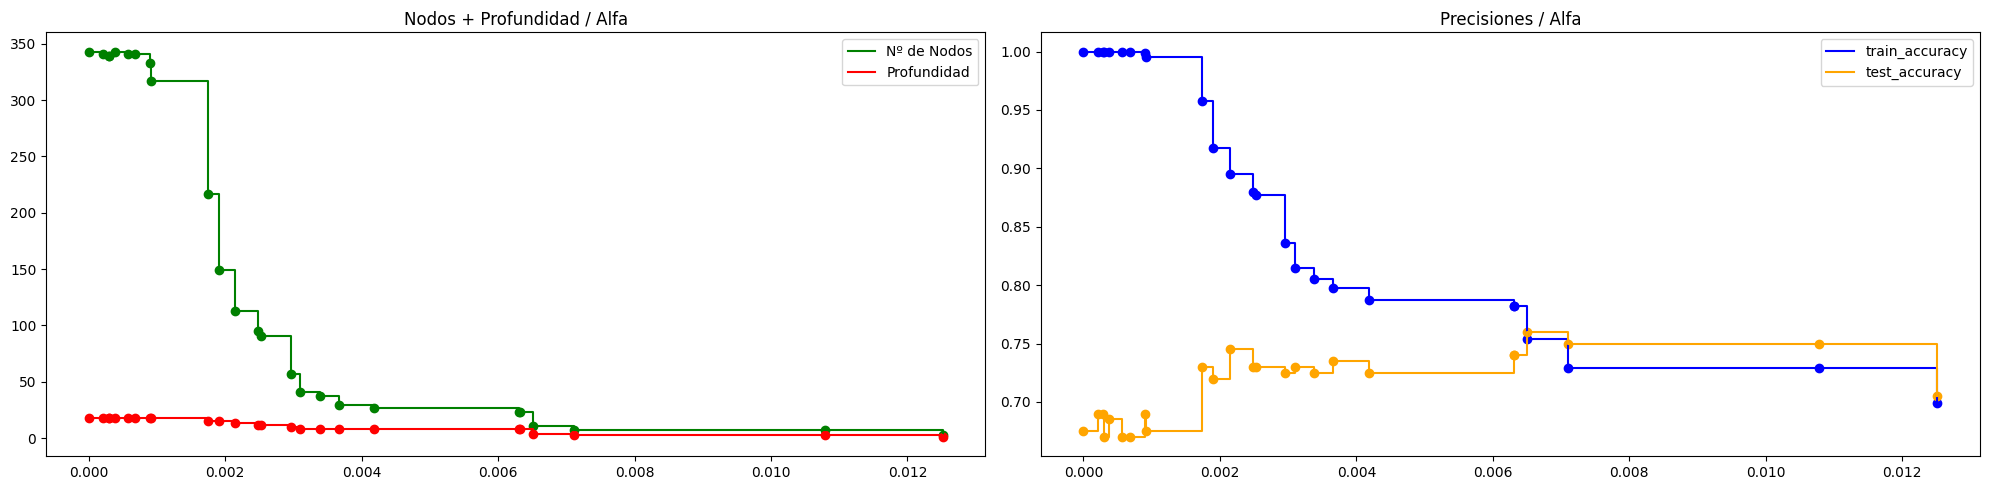

In [32]:
# Numero de nodos y profundidades de cada modelo.
node_counts = [clf.tree_.node_count for clf in clfs_ADD]
depth = [clf.tree_.max_depth for clf in clfs_ADD]

# Precisiones de entrenamiento y test de cada modelo.
train_acc = []
test_acc = []
for c in clfs_ADD:
    clfs_yhatTrain = c.predict(XTrain)
    clfs_yhatTest = c.predict(XTest)
    train_acc.append(accuracy_score(clfs_yhatTrain, yTrain))
    test_acc.append(accuracy_score(clfs_yhatTest, yTest))

plt.figure(figsize=(20, 5))

# Gráfica Nº Nodos/Profundidad
plt.subplot(1, 2, 1)
plt.scatter(ccp_alphas, node_counts, color='green')
plt.scatter(ccp_alphas, depth, color='red')
plt.plot(ccp_alphas, node_counts, label='Nº de Nodos', drawstyle="steps-post", color='green')
plt.plot(ccp_alphas, depth, label='Profundidad', drawstyle="steps-post", color='red')
plt.legend()
plt.title('Nodos + Profundidad / Alfa')

# Gráfica de precisiones
plt.subplot(1, 2, 2)
plt.scatter(ccp_alphas, train_acc, color='blue')
plt.scatter(ccp_alphas, test_acc, color='orange')
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post", color='blue')
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post", color='orange')
plt.legend()
plt.title('Precisiones / Alfa')

plt.tight_layout()
plt.show()


In [33]:
ccp = ccp_alphas[-4]
ccp

0.006506107804891942

Podemos ver que hay grandes diferencias en el modelo cuando ccp_alpha=0 y que el caso que muestra un mejor ajuste es ccp_alpha=ccp. Este modelo nos presenta una relación equilibrada entre el número de nodos y la profundida máxima y lo mismo ocurre con las precisiones. En general vemos que hay una diferencia considerable entre ambas para distintos valores de alfa pero en ccp_alpha=ccp ambos valores convergen, indicando similaridad y, por tanto, mucho menos sobreajuste en el modelo. Los últimos valores de alfa también muestran precisiones similares pero ninguno con tanta cercanía entre ambas y con el valor más alto posible, siendo la precisión de test mayor que la de entrenamiento. 

Determinamos, por tanto, que es mejor realizar una poda con un valor de ccp_alpha=ccp. Tenemos, entonces, que volver a buscar la mejor combinación de parámetros con el nuevo alfa ya que, al cambiar este valor, el conjunto óptimo cambiará también. 

In [34]:
param_grid = {
    'min_samples_leaf': [5,10],
    'min_samples_split':[5, 10, 20],
    'max_depth': np.arange(2,11),
    'criterion': ['entropy', 'gini']
}

clf_ADD = GridSearchCV(DecisionTreeClassifier(random_state=42, ccp_alpha=ccp), param_grid, cv=skf)
clf_ADD.fit(XTrain , yTrain)

model_ADD = clf_ADD.best_estimator_
CV_ADD = clf_ADD.best_score_
print("Best estimator found by grid search: ", model_ADD)
print()
print("CV-Validation Accuracy: ", CV_ADD)

Best estimator found by grid search:  DecisionTreeClassifier(ccp_alpha=0.006506107804891942, max_depth=4,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

CV-Validation Accuracy:  0.7237500000000001


Ahora, con el mejor modelo obtenido volvemos a realizar la predicción de entrenamiento y comprobamos la calidad de los resultados obtenidos.

In [35]:
yhatTrain = clf_ADD.predict(XTrain)

Train_Accuracy_ADD = metrics.accuracy_score(yTrain, yhatTrain)
Train_Precision_ADD = metrics.precision_score(yTrain, yhatTrain)
Train_Recall_ADD = metrics.recall_score(yTrain, yhatTrain)
Train_F1_ADD = metrics.f1_score(yTrain, yhatTrain)
Train_Error_ADD = np.mean(yhatTrain != yTrain)
Train_std_Error_ADD = np.std(yhatTrain != yTrain)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Entrenamiento: ')
print()
print("Train Accuracy: ", Train_Accuracy_ADD)
print("Train Precision: ", Train_Precision_ADD)
print("Train Recall: ", Train_Recall_ADD)
print("Train F1: ", Train_F1_ADD)
print()

# Error de entrenamiendo medio y desviación típica.
print('Train Error: ', Train_Error_ADD)
print('Train Error Std: ', Train_std_Error_ADD)
print()

# Matriz de Confusión del conjunto de entrenamiento.
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(yTrain,yhatTrain))
print()
print(classification_report(yTrain,yhatTrain))

Datos de Entrenamiento: 

Train Accuracy:  0.75375
Train Precision:  0.8047138047138047
Train Recall:  0.855098389982111
Train F1:  0.829141370338248

Train Error:  0.24625
Train Error Std:  0.43082587840100783

----------------Train Confusion Matrix------------------
[[478  81]
 [116 125]]

              precision    recall  f1-score   support

           1       0.80      0.86      0.83       559
           2       0.61      0.52      0.56       241

    accuracy                           0.75       800
   macro avg       0.71      0.69      0.69       800
weighted avg       0.75      0.75      0.75       800



Y lo mismo con los ejemplos de test.

In [36]:
yhatTest = clf_ADD.predict(XTest)

Test_Accuracy_ADD = metrics.accuracy_score(yTest, yhatTest)
Test_Precision_ADD = metrics.precision_score(yTest, yhatTest)
Test_Recall_ADD = metrics.recall_score(yTest, yhatTest)
Test_F1_ADD = metrics.f1_score(yTest, yhatTest)
Test_Error_ADD = np.mean(yhatTest != yTest)
Test_std_Error_ADD = np.std(yhatTest != yTest)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Test: ')
print()
print("Test Accuracy: ", Test_Accuracy_ADD)
print("Test Precision: ", Test_Precision_ADD)
print("Test Recall: ", Test_Recall_ADD)
print("Test F1: ", Test_F1_ADD)
print()

# Error de test medio y desviación típica.
print('Test Error: ', Test_Error_ADD)
print('Test Error Std: ', Test_std_Error_ADD)
print()

# Matriz de Confusión del conjunto de test.
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print()
print(classification_report(yTest,yhatTest))

Datos de Test: 

Test Accuracy:  0.76
Test Precision:  0.8079470198675497
Test Recall:  0.8652482269503546
Test F1:  0.8356164383561644

Test Error:  0.39545
Test Error Std:  0.48894713160013514

----------------Test Confusion Matrix------------------
[[122  19]
 [ 29  30]]

              precision    recall  f1-score   support

           1       0.81      0.87      0.84       141
           2       0.61      0.51      0.56        59

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



Agrupamos y resumimos estos resultados en una sola tabla:

In [37]:
ADD_data = {
    'Data': ['Train', 'Test'],
    'Accuracy': [Train_Accuracy_ADD, Test_Accuracy_ADD],
    'Precision': [Train_Precision_ADD, Test_Precision_ADD],
    'Recall': [Train_Recall_ADD, Test_Recall_ADD],
    'F1': [Train_F1_ADD, Test_F1_ADD],
    'Error': [Train_Error_ADD, Test_Error_ADD],
    'Std Error': [Train_std_Error_ADD, Test_std_Error_ADD]
}
ADD_df = pd.DataFrame(ADD_data).round(2)
ADD_df

,Data,Accuracy,Precision,Recall,F1,Error,Std Error
0,Train,0.75,0.80,0.86,0.83,0.25,0.43
1,Test,0.76,0.81,0.87,0.84,0.40,0.49


Para obtener mejores conclusiones acerca del modelo y su clasificación, observaremos también la estructura del árbol.

In [38]:
texto_modelo = export_text(
                    decision_tree = model_ADD,
                    feature_names = list(X.columns)
               )
print(texto_modelo)

|--- Cuenta <= 0.50
|   |--- class: 1
|--- Cuenta >  0.50
|   |--- Duracion <= 0.27
|   |   |--- Historial <= 2.50
|   |   |   |--- class: 1
|   |   |--- Historial >  2.50
|   |   |   |--- class: 2
|   |--- Duracion >  0.27
|   |   |--- Ahorros <= 0.50
|   |   |   |--- Cantidad <= 0.07
|   |   |   |   |--- class: 2
|   |   |   |--- Cantidad >  0.07
|   |   |   |   |--- class: 1
|   |   |--- Ahorros >  0.50
|   |   |   |--- class: 2



Así como la gráfica de clasificación del árbol.

Profundidad del árbol: 4
Número de nodos terminales: 6


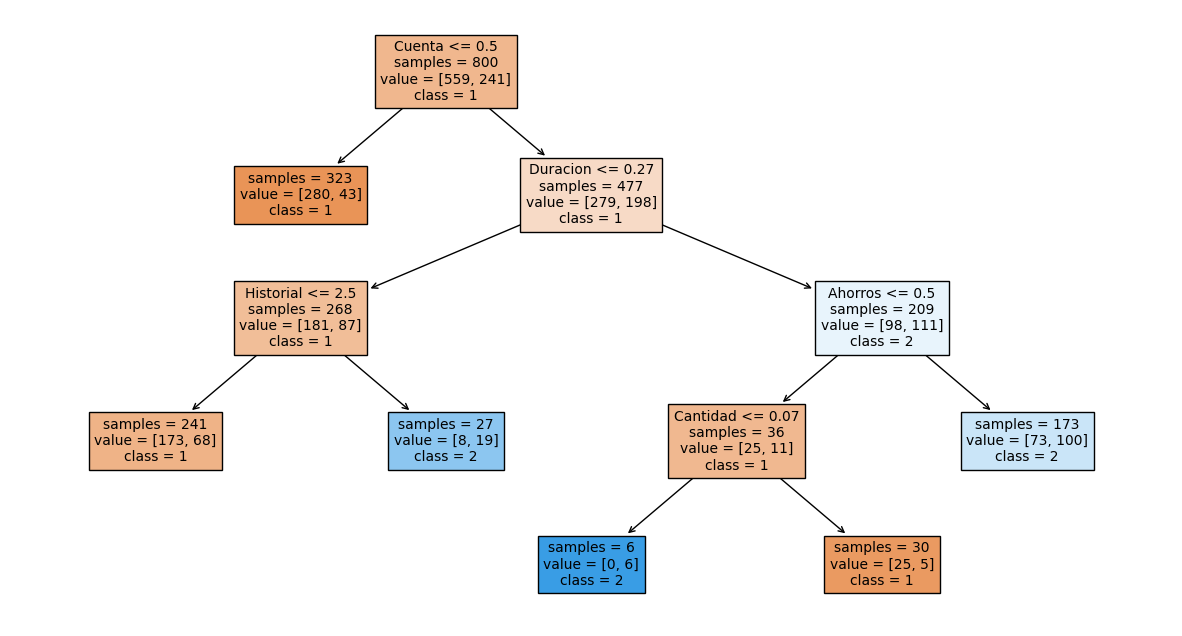

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))

print(f"Profundidad del árbol: {model_ADD.get_depth()}")
print(f"Número de nodos terminales: {model_ADD.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_ADD,
            feature_names = list(X.columns),
            class_names   = ['1', '2'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### MODELO 3: REGRESIÓN LOGÍSTICA

Para el tercer modelo utilizaremos Regresión Logística, un algoritmo que permite clasificar observaciones en función de clases categóricas (discretas). Consiste en implementar una ecuación lineal con las variables explicativas independientes del tipo: z = β0 + β1x1 + β2x2 + ... + βnxn donde los coeficientes βi son los parámetros del modelo. El valor z obtenido por la recta se introduce después como entrada de una función sigmoide que lo expresa como una probabilidad, en rango [0, 1]. En nuestro caso como se trata de una decisión binaria la frontera de decisión se establece en 0.5 generalmente donde aquellos puntos con p>=0.5 se clasificarán como 'Aptos' y aquellos con p<=0.5 como 'No Aptos'. 

Por tanto, lo primero que haremos es estudiar la correlación entre las variables explicativas y comprobar que no existe una multicolinealidad alta entre ellas que pueda afectar considerablemente el rendimiento del modelo. 

Text(0.5, 1.0, 'Correlation Heatmap')

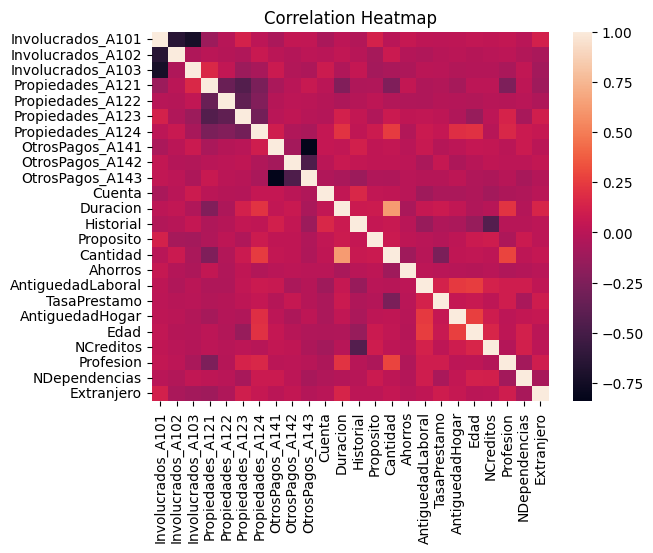

In [40]:
corr_data = X.corr()
sns.heatmap(corr_data)
plt.title('Correlation Heatmap')

Vemos que, por lo general, no existe una fuerte correlación entre las variables independientes, por lo que continuamos con el estudio del modelo. 

El algoritmo de Regresión Logística tiene múltiplos parámetros. No obstante hay 3 que nos interesan cocretamente para nuestro caso:
- Parámetro 'C' de regularización: este valor ayuda a prevenir el sobreajuste del modelo al penalizar los coeficientes más grandes. Es el inverso del parámetro de regularización por lo que, cuanto mayor sea C menor será la regularización. Nos interesa entonces tener valores de C bajos.
- Parámetro 'penalty': tenemos dos valores posibles, 'l1' y 'l2'. L1 favorece los coeficientes dispersos, útil cuando hay varibles que podrían ser irrelevantes. L2 penaliza los coeficientes grandes. 
- Parámetro 'solver': especifica el algoritmo a utilizar en la optimización del problema. Depende del valor de 'penalty'.                                                      

Para los dos últimos parámetros utilizaremos los valores por defecto, 'l2' y 'lbfgs' respectivamente. 

El parámetro más importante a elegir es el valor de C puesto que queremos evitar el sobreajuste del modelo. Por ello, antes de emplear Validación Cruzada, estudiamos, como en el caso de Árboles de Decisión, qué valor iguala de forma más exacta las precisiones de entrenamiento y test. 

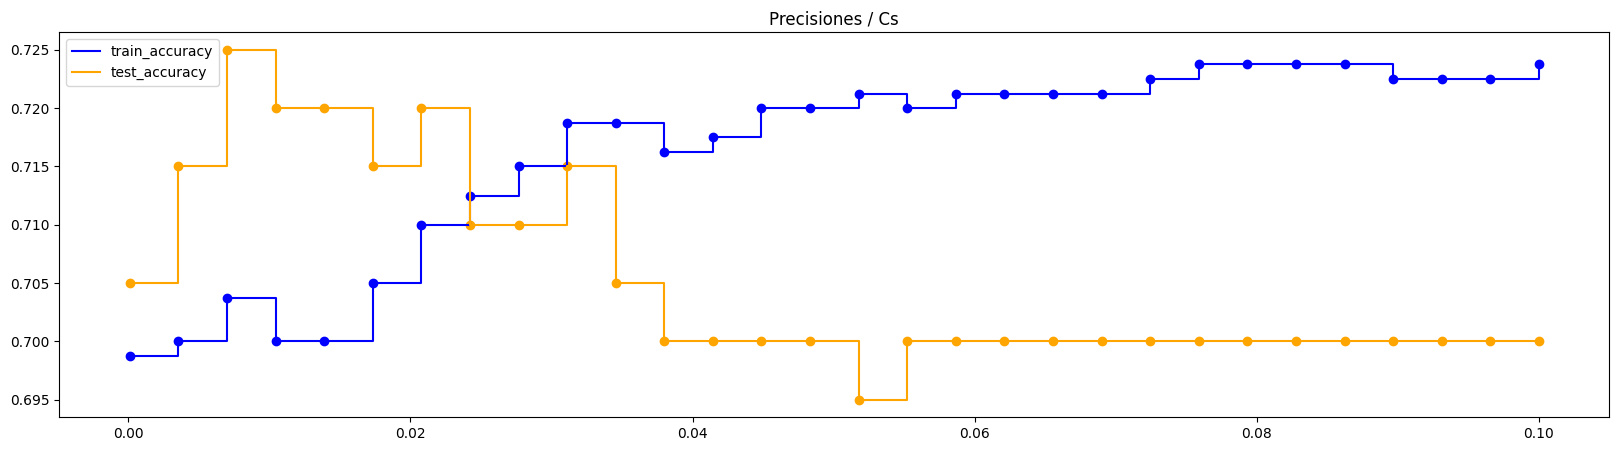

In [41]:
# Modelos para cada valor de C
c_values_RL = np.linspace(0.0001, 0.1, 30)
clfs_RL = []
for c_value in c_values_RL:
    clf = LogisticRegression(C=c_value, random_state=42)
    clf.fit(XTrain, yTrain)
    clfs_RL.append(clf)

# Precisiones de entrenamiento y test de cada modelo.
train_acc = []
test_acc = []
for c in clfs_RL:
    clfs_yhatTrain = c.predict(XTrain)
    clfs_yhatTest = c.predict(XTest)
    train_acc.append(accuracy_score(clfs_yhatTrain, yTrain))
    test_acc.append(accuracy_score(clfs_yhatTest, yTest))

# Gráfica de precisiones
plt.figure(figsize=(20, 5))
plt.scatter(c_values_RL, train_acc, color='blue')
plt.scatter(c_values_RL, test_acc, color='orange')
plt.plot(c_values_RL, train_acc, label='train_accuracy', drawstyle="steps-post", color='blue')
plt.plot(c_values_RL, test_acc, label='test_accuracy', drawstyle="steps-post", color='orange')
plt.legend()
plt.title('Precisiones / Cs')
plt.show()

Podemos ver que el valor que mejor relación nos da entre la cercanía de ambas precisiones y el valor más alto posible es el 10º valor de la lista c_values.

In [42]:
C_RL = c_values_RL[9]
C_RL

0.031103448275862068

Ahora empleamos Validación Cruzada para estudiar qué valor de C considera que es más óptimo. 

In [43]:
param_grid = {'C': np.linspace(0.0001, 0.1, 30)}
clf_RL = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=skf)
clf_RL.fit(XTrain, yTrain)
model_RL = clf_RL.best_estimator_
print("Best estimator found by grid search: ", model_RL)

Best estimator found by grid search:  LogisticRegression(C=0.05521724137931035, random_state=42)


La precisión obtenida en el proceso de Validación Cruzada es:

In [44]:
print("CV-Validation Accuracy: ", clf_RL.best_score_)

CV-Validation Accuracy:  0.71625


De nuevo, como GridSearchCV se ajusta a los datos de entrenamiento, nos proporciona un valor de C que, según el estudio pervio, nos da un modelo sobreajustado. Utilizamos por tanto el primer valor de C obtenido. 

In [45]:
clf_RL = LogisticRegression(C=C_RL, random_state=42)
clf_RL.fit(XTrain, yTrain)
print("Best estimator found: ", clf_RL)

Best estimator found:  LogisticRegression(C=0.031103448275862068, random_state=42)


El modelo final que emplearemos tiene una precisión en Validación Cruzada de:

In [46]:
CV_RL = cross_val_score(clf_RL, X, y.to_numpy().ravel(), cv=skf, scoring='accuracy').mean()
print("CV-Validation Accuracy: ", CV_RL)

CV-Validation Accuracy:  0.7070000000000001


Ahora realizamos las predicciones y obtenemos las métricas de rendimiento del modelo. 

In [47]:
yhatTrain = clf_RL.predict(XTrain)

Train_Accuracy_RL = metrics.accuracy_score(yTrain, yhatTrain)
Train_Precision_RL = metrics.precision_score(yTrain, yhatTrain)
Train_Recall_RL = metrics.recall_score(yTrain, yhatTrain)
Train_F1_RL = metrics.f1_score(yTrain, yhatTrain)
Train_Error_RL = np.mean(yhatTrain != yTrain)
Train_std_Error_RL = np.std(yhatTrain != yTrain)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Entrenamiento: ')
print()
print("Train Accuracy: ", Train_Accuracy_RL)
print("Train Precision: ", Train_Precision_RL)
print("Train Recall: ", Train_Recall_RL)
print("Train F1: ", Train_F1_RL)
print()

# Error de entrenamiendo medio y desviación típica.
print('Train Error: ', Train_Error_RL)
print('Train Error Std: ', Train_std_Error_RL)
print()

# Matriz de Confusión del conjunto de entrenamiento.
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(yTrain,yhatTrain))
print()
print(classification_report(yTrain,yhatTrain))

Datos de Entrenamiento: 

Train Accuracy:  0.71875
Train Precision:  0.7293956043956044
Train Recall:  0.9499105545617174
Train F1:  0.8251748251748251

Train Error:  0.28125
Train Error Std:  0.4496092053105675

----------------Train Confusion Matrix------------------
[[531  28]
 [197  44]]

              precision    recall  f1-score   support

           1       0.73      0.95      0.83       559
           2       0.61      0.18      0.28       241

    accuracy                           0.72       800
   macro avg       0.67      0.57      0.55       800
weighted avg       0.69      0.72      0.66       800



In [48]:
yhatTest = clf_RL.predict(XTest)

Test_Accuracy_RL = metrics.accuracy_score(yTest, yhatTest)
Test_Precision_RL = metrics.precision_score(yTest, yhatTest)
Test_Recall_RL = metrics.recall_score(yTest, yhatTest)
Test_F1_RL = metrics.f1_score(yTest, yhatTest)
Test_Error_RL = np.mean(yhatTest != yTest)
Test_std_Error_RL = np.std(yhatTest != yTest)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Test: ')
print()
print("Test Accuracy: ", Test_Accuracy_RL)
print("Test Precision: ", Test_Precision_RL)
print("Test Recall: ", Test_Recall_RL)
print("Test F1: ", Test_F1_RL)
print()

# Error de test medio y desviación típica.
print('Test Error: ', Test_Error_RL)
print('Test Error Std: ', Test_std_Error_RL)
print()

# Matriz de Confusión del conjunto de test.
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print()
print(classification_report(yTest,yhatTest))

Datos de Test: 

Test Accuracy:  0.715
Test Precision:  0.7307692307692307
Test Recall:  0.9432624113475178
Test F1:  0.8235294117647058

Test Error:  0.3319
Test Error Std:  0.4708953068358188

----------------Test Confusion Matrix------------------
[[133   8]
 [ 49  10]]

              precision    recall  f1-score   support

           1       0.73      0.94      0.82       141
           2       0.56      0.17      0.26        59

    accuracy                           0.71       200
   macro avg       0.64      0.56      0.54       200
weighted avg       0.68      0.71      0.66       200



Agrupamos y resumimos estos resultados en una sola tabla:

In [49]:
RL_data = {
    'Data': ['Train', 'Test'],
    'Accuracy': [Train_Accuracy_RL, Test_Accuracy_RL],
    'Precision': [Train_Precision_RL, Test_Precision_RL],
    'Recall': [Train_Recall_RL, Test_Recall_RL],
    'F1': [Train_F1_RL, Test_F1_RL],
    'Error': [Train_Error_RL, Test_Error_RL],
    'Std Error': [Train_std_Error_RL, Test_std_Error_RL]
}
RL_df = pd.DataFrame(RL_data).round(2)
RL_df

,Data,Accuracy,Precision,Recall,F1,Error,Std Error
0,Train,0.72,0.73,0.95,0.83,0.28,0.45
1,Test,0.72,0.73,0.94,0.82,0.33,0.47


### MODELO 4: SVM (Support Vector Machines)

Para el cuarto y último modelo utilizaremos el algoritmo SVM (Support Vector Machines), que consiste en buscar un hiperplano que maximice el margen entre ambas clases, en el caso de clasificación binaria. 

En este algoritmo tenemos dos parámetros de interés:
- Parámetro 'kernel': esta métrica puede tomar diversos valores distintos, y determina el tipo de función kernel que se utilizará en el modelo. En nuestro caso escogeremos 'linear', específico para problemas de clasificación lineal y eficiente. 
- Parámetro 'C': como en el caso de Regresión Logística, esta métrica determina la regularización del modelo. 

Comenzaremos utilizando Validación Cruzada para encontrar el mejor valor de C , probando con distintos valores de tamaños muy distintos para encontrar una aproximación.

In [50]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
clf_SVC = GridSearchCV(svm.SVC(kernel="linear", random_state=42), param_grid, cv=skf)
clf_SVC.fit(XTrain, yTrain)
model_SVC = clf_SVC.best_estimator_
print("Best estimator found by grid search: ", model_SVC)

Best estimator found by grid search:  SVC(C=1, kernel='linear', random_state=42)


Una vez tenemos el mejor modelo de C, estudiamos más en concreto qué valor optimiza las precisiones de entrenamiento y test, con un rango de C en torno al valor obtenido con Validación Cruzada. 

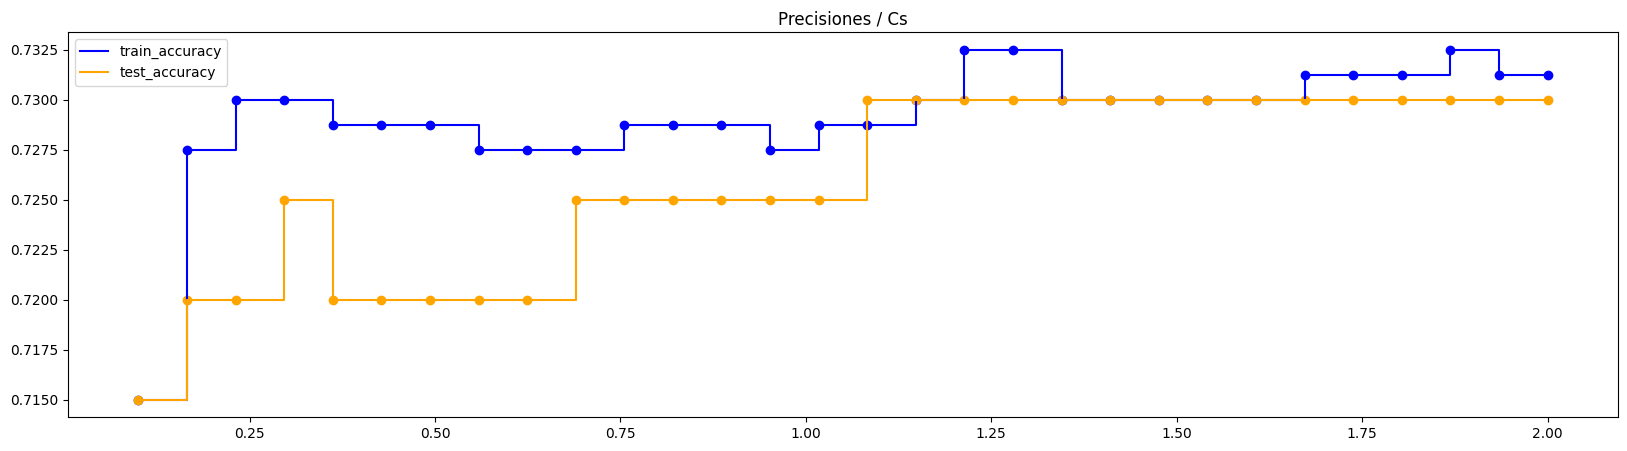

In [51]:
# Modelos para cada valor de C
c_values_SVC = np.linspace(0.1, 2, 30)
clfs_SVC = []
for c_value in c_values_SVC:
    clf = svm.SVC(kernel="linear", C=c_value, random_state=42)
    clf.fit(XTrain, yTrain)
    clfs_SVC.append(clf)

# Precisiones de entrenamiento y test de cada modelo.
train_acc = []
test_acc = []
for c in clfs_SVC:
    clfs_yhatTrain = c.predict(XTrain)
    clfs_yhatTest = c.predict(XTest)
    train_acc.append(accuracy_score(clfs_yhatTrain, yTrain))
    test_acc.append(accuracy_score(clfs_yhatTest, yTest))

# Gráfica de precisiones
plt.figure(figsize=(20, 5))
plt.scatter(c_values_SVC, train_acc, color='blue')
plt.scatter(c_values_SVC, test_acc, color='orange')
plt.plot(c_values_SVC, train_acc, label='train_accuracy', drawstyle="steps-post", color='blue')
plt.plot(c_values_SVC, test_acc, label='test_accuracy', drawstyle="steps-post", color='orange')
plt.legend()
plt.title('Precisiones / Cs')
plt.show()

Vemos que el valor donde ambas precisiones son más similares y tienen un valor máximo es en el 17º valor. Ese será, entonces, el que utilizaremos en nuestro modelo.

In [52]:
C_SVC = c_values_SVC[16]
C_SVC

1.1482758620689655

In [53]:
clf_SVC = svm.SVC(kernel="linear", C=C_SVC)
clf_SVC.fit(XTrain, yTrain)
print("Best estimator found: ", clf_SVC)

Best estimator found:  SVC(C=1.1482758620689655, kernel='linear')


El modelo final que emplearemos tiene una precisión de Validación Cruzada de:

In [54]:
CV_SVC = cross_val_score(clf_SVC, X, y.to_numpy().ravel(), cv=skf, scoring='accuracy').mean()
print("CV-Validation Accuracy: ", CV_SVC)

CV-Validation Accuracy:  0.713


Estudiamos las métricas de precisión del modelo:

In [55]:
yhatTrain = clf_SVC.predict(XTrain)

Train_Accuracy_SVC = metrics.accuracy_score(yTrain, yhatTrain)
Train_Precision_SVC = metrics.precision_score(yTrain, yhatTrain)
Train_Recall_SVC = metrics.recall_score(yTrain, yhatTrain)
Train_F1_SVC = metrics.f1_score(yTrain, yhatTrain)
Train_Error_SVC = np.mean(yhatTrain != yTrain)
Train_std_Error_SVC = np.std(yhatTrain != yTrain)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Entrenamiento: ')
print()
print("Train Accuracy: ", Train_Accuracy_SVC)
print("Train Precision: ", Train_Precision_SVC)
print("Train Recall: ", Train_Recall_SVC)
print("Train F1: ", Train_F1_SVC)
print()

# Error de entrenamiendo medio y desviación típica.
print('Train Error: ', Train_Error_SVC)
print('Train Error Std: ', Train_std_Error_SVC)
print()

# Matriz de Confusión del conjunto de entrenamiento.
print('----------------Train Confusion Matrix------------------')
print(confusion_matrix(yTrain,yhatTrain))
print()
print(classification_report(yTrain,yhatTrain))

Datos de Entrenamiento: 

Train Accuracy:  0.73
Train Precision:  0.7339699863574352
Train Recall:  0.962432915921288
Train F1:  0.8328173374613002

Train Error:  0.27
Train Error Std:  0.4439594576084623

----------------Train Confusion Matrix------------------
[[538  21]
 [195  46]]

              precision    recall  f1-score   support

           1       0.73      0.96      0.83       559
           2       0.69      0.19      0.30       241

    accuracy                           0.73       800
   macro avg       0.71      0.58      0.57       800
weighted avg       0.72      0.73      0.67       800



In [56]:
yhatTest = clf_SVC.predict(XTest)

Test_Accuracy_SVC = metrics.accuracy_score(yTest, yhatTest)
Test_Precision_SVC = metrics.precision_score(yTest, yhatTest)
Test_Recall_SVC = metrics.recall_score(yTest, yhatTest)
Test_F1_SVC = metrics.f1_score(yTest, yhatTest)
Test_Error_SVC = np.mean(yhatTest != yTest)
Test_std_Error_SVC = np.std(yhatTest != yTest)

# Métricas del rendimiento del modelo utilizando sklearn.metrics package
print('Datos de Test: ')
print()
print("Test Accuracy: ", Test_Accuracy_SVC)
print("Test Precision: ", Test_Precision_SVC)
print("Test Recall: ", Test_Recall_SVC)
print("Test F1: ", Test_F1_SVC)
print()

# Error de test medio y desviación típica.
print('Test Error: ', Test_Error_SVC)
print('Test Error Std: ', Test_std_Error_SVC)
print()

# Matriz de Confusión del conjunto de test.
print('----------------Test Confusion Matrix------------------')
print(confusion_matrix(yTest,yhatTest))
print()
print(classification_report(yTest,yhatTest))

Datos de Test: 

Test Accuracy:  0.73
Test Precision:  0.732620320855615
Test Recall:  0.9716312056737588
Test F1:  0.8353658536585367

Test Error:  0.32165
Test Error Std:  0.4671094919823403

----------------Test Confusion Matrix------------------
[[137   4]
 [ 50   9]]

              precision    recall  f1-score   support

           1       0.73      0.97      0.84       141
           2       0.69      0.15      0.25        59

    accuracy                           0.73       200
   macro avg       0.71      0.56      0.54       200
weighted avg       0.72      0.73      0.66       200



Agrupamos y resumimos estos resultados en una sola tabla:

In [57]:
SVC_data = {
    'Data': ['Train', 'Test'],
    'Accuracy': [Train_Accuracy_SVC, Test_Accuracy_SVC],
    'Precision': [Train_Precision_SVC, Test_Precision_SVC],
    'Recall': [Train_Recall_SVC, Test_Recall_SVC],
    'F1': [Train_F1_SVC, Test_F1_SVC],
    'Error': [Train_Error_SVC, Test_Error_SVC],
    'Std Error': [Train_std_Error_SVC, Test_std_Error_SVC]
}
SVC_df = pd.DataFrame(SVC_data).round(2)
SVC_df

,Data,Accuracy,Precision,Recall,F1,Error,Std Error
0,Train,0.73,0.73,0.96,0.83,0.27,0.44
1,Test,0.73,0.73,0.97,0.84,0.32,0.47


## RESULTADOS

Una vez tenemos todos los modelos y sus correspondientes métricas de evaluación y rendimiento, procedemos a estudiar cuál de los 4 es el mejor. 

Primero comparamos los valores de Cross Validation Accuracy de cada modelo. 

In [58]:
CV_data = {
    'Modelo': ['K-NN', 'Decision Tree', 'Logistic Regression', 'SVC'],
    'CV-Accuracy': [CV_KNN, CV_ADD, CV_RL, CV_SVC]
}
CV_df = pd.DataFrame(CV_data).round(2)
CV_df

,Modelo,CV-Accuracy
0,K-NN,0.73
1,Decision Tree,0.72
2,Logistic Regression,0.71
3,SVC,0.71


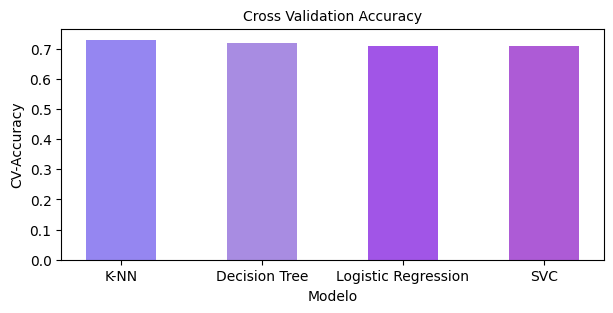

In [59]:
colores = ['mediumslateblue', 'mediumpurple', 'blueviolet', 'darkorchid']
plt.figure(figsize=(7, 3))
plt.bar(CV_df['Modelo'], CV_df['CV-Accuracy'], color=colores, alpha=0.8, width=0.5)
plt.xlabel('Modelo', fontdict={'fontsize': 10})
plt.ylabel('CV-Accuracy', fontdict={'fontsize': 10})
plt.title('Cross Validation Accuracy', fontdict={'fontsize': 10})
plt.show()

Ahora comparamos todas las métricas de evaluación del conjunto de entrenamiento.

In [60]:
Train_data = {
    'Modelo': ['K-NN', 'Decision Tree', 'Logistic Regression', 'SVC'],
    'Train Accuracy': [Train_Accuracy_KNN, Train_Accuracy_ADD, Train_Accuracy_RL, Train_Accuracy_SVC],
    'Train Precision': [Train_Precision_KNN, Train_Precision_ADD, Train_Precision_RL, Train_Precision_SVC],
    'Train Recall': [Train_Recall_KNN, Train_Recall_ADD, Train_Recall_RL, Train_Recall_SVC],
    'Train F1': [Train_F1_KNN, Train_F1_ADD, Train_F1_RL, Train_F1_SVC],
    'Train Error': [Train_Error_KNN, Train_Error_ADD, Train_Error_RL, Train_Error_SVC],
    'Train Standard Error': [Train_std_Error_KNN, Train_std_Error_ADD, Train_std_Error_RL, Train_std_Error_SVC]
}
Train_df = pd.DataFrame(Train_data).round(2)
Train_df

,Modelo,Train Accuracy,Train Precision,Train Recall,Train F1,Train Error,Train Standard Error
0,K-NN,0.75,0.76,0.94,0.84,0.25,0.43
1,Decision Tree,0.75,0.80,0.86,0.83,0.25,0.43
2,Logistic Regression,0.72,0.73,0.95,0.83,0.28,0.45
3,SVC,0.73,0.73,0.96,0.83,0.27,0.44


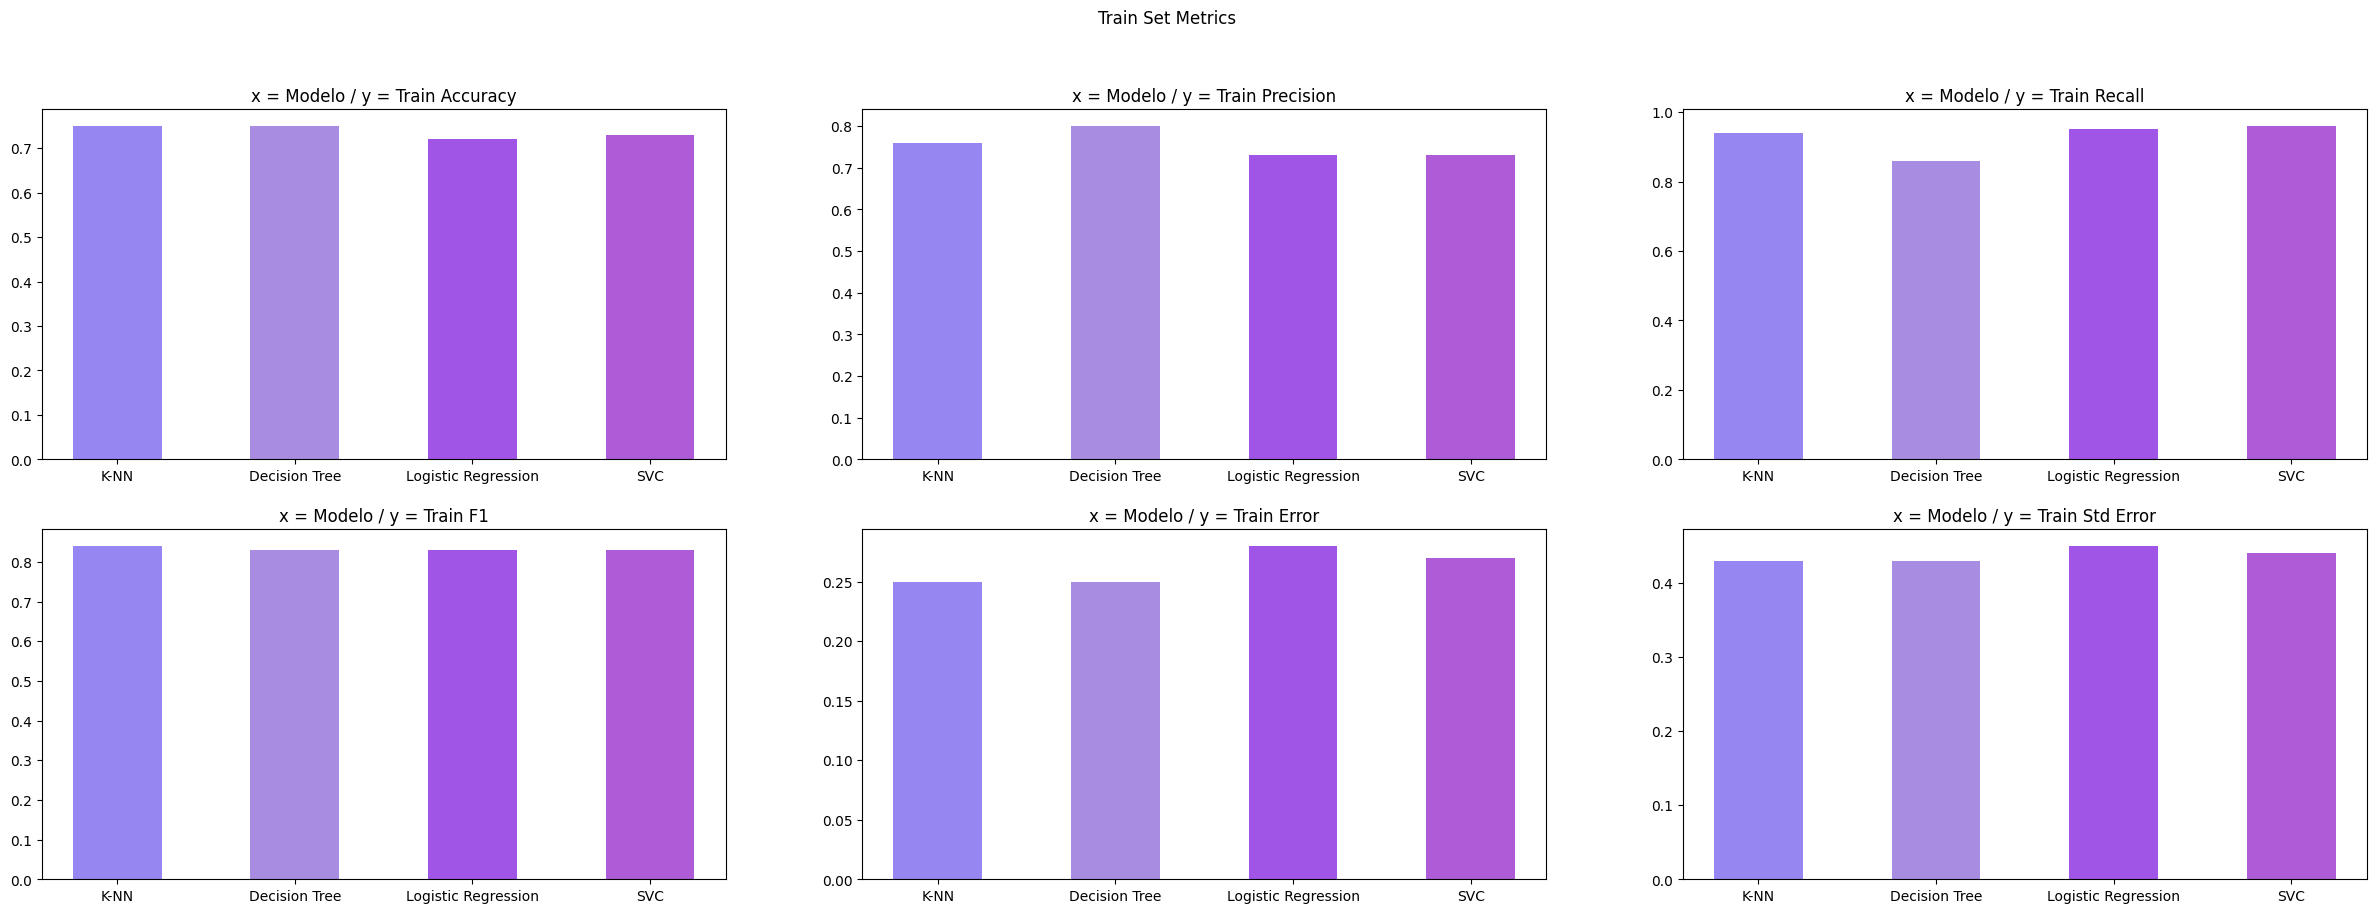

In [61]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))

axs[0, 0].bar(Train_df['Modelo'], Train_df['Train Accuracy'], color=colores, alpha=0.8, width=0.5)
axs[0, 0].set_title('x = Modelo / y = Train Accuracy')

axs[0, 1].bar(Train_df['Modelo'], Train_df['Train Precision'], color=colores, alpha=0.8, width=0.5)
axs[0, 1].set_title('x = Modelo / y = Train Precision')

axs[0, 2].bar(Train_df['Modelo'], Train_df['Train Recall'], color=colores, alpha=0.8, width=0.5)
axs[0, 2].set_title('x = Modelo / y = Train Recall')

axs[1, 0].bar(Train_df['Modelo'], Train_df['Train F1'], color=colores, alpha=0.8, width=0.5)
axs[1, 0].set_title('x = Modelo / y = Train F1')

axs[1, 1].bar(Train_df['Modelo'], Train_df['Train Error'], color=colores, alpha=0.8, width=0.5)
axs[1, 1].set_title('x = Modelo / y = Train Error')

axs[1, 2].bar(Train_df['Modelo'], Train_df['Train Standard Error'], color=colores, alpha=0.8, width=0.5)
axs[1, 2].set_title('x = Modelo / y = Train Std Error')

plt.suptitle('Train Set Metrics')
plt.show()

Y, por último, las métricas de evaluación del conjunto de test.

In [62]:
Test_data = {
    'Modelo': ['K-NN', 'Decision Tree', 'Logistic Regression', 'SVC'],
    'Test Accuracy': [Test_Accuracy_KNN, Test_Accuracy_ADD, Test_Accuracy_RL, Test_Accuracy_SVC],
    'Test Precision': [Test_Precision_KNN, Test_Precision_ADD, Test_Precision_RL, Test_Precision_SVC],
    'Test Recall': [Test_Recall_KNN, Test_Recall_ADD, Test_Recall_RL, Test_Recall_SVC],
    'Test F1': [Test_F1_KNN, Test_F1_ADD, Test_F1_RL, Test_F1_SVC],
    'Test Error': [Test_Error_KNN, Test_Error_ADD, Test_Error_RL, Test_Error_SVC],
    'Test Standard Error': [Test_std_Error_KNN, Test_std_Error_ADD, Test_std_Error_RL, Test_std_Error_SVC]
}
Test_df = pd.DataFrame(Test_data).round(2)
Test_df

,Modelo,Test Accuracy,Test Precision,Test Recall,Test F1,Test Error,Test Standard Error
0,K-NN,0.71,0.73,0.92,0.82,0.34,0.47
1,Decision Tree,0.76,0.81,0.87,0.84,0.40,0.49
2,Logistic Regression,0.72,0.73,0.94,0.82,0.33,0.47
3,SVC,0.73,0.73,0.97,0.84,0.32,0.47


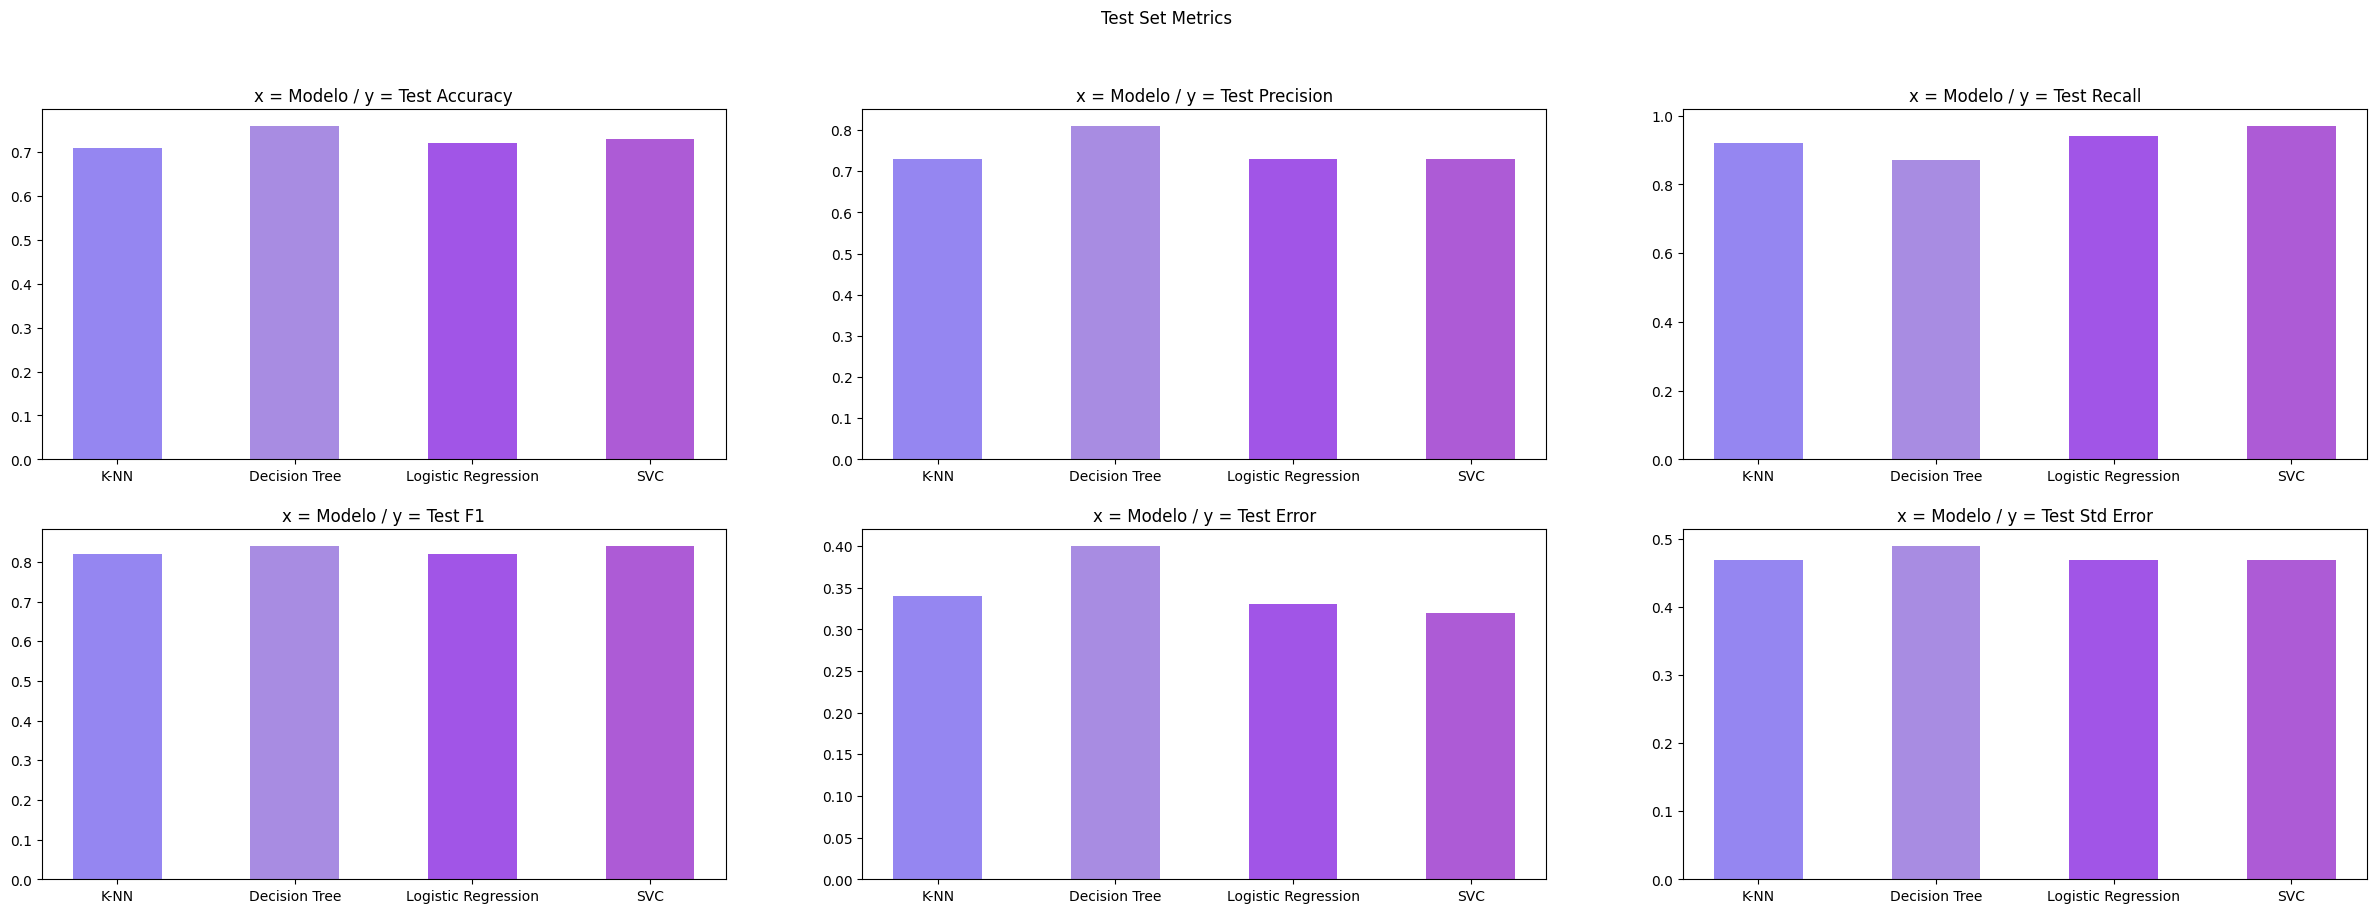

In [63]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))

axs[0, 0].bar(Test_df['Modelo'], Test_df['Test Accuracy'], color=colores, alpha=0.8, width=0.5)
axs[0, 0].set_title('x = Modelo / y = Test Accuracy')

axs[0, 1].bar(Test_df['Modelo'], Test_df['Test Precision'], color=colores, alpha=0.8, width=0.5)
axs[0, 1].set_title('x = Modelo / y = Test Precision')

axs[0, 2].bar(Test_df['Modelo'], Test_df['Test Recall'], color=colores, alpha=0.8, width=0.5)
axs[0, 2].set_title('x = Modelo / y = Test Recall')

axs[1, 0].bar(Test_df['Modelo'], Test_df['Test F1'], color=colores, alpha=0.8, width=0.5)
axs[1, 0].set_title('x = Modelo / y = Test F1')

axs[1, 1].bar(Test_df['Modelo'], Test_df['Test Error'], color=colores, alpha=0.8, width=0.5)
axs[1, 1].set_title('x = Modelo / y = Test Error')

axs[1, 2].bar(Test_df['Modelo'], Test_df['Test Standard Error'], color=colores, alpha=0.8, width=0.5)
axs[1, 2].set_title('x = Modelo / y = Test Std Error')

plt.suptitle('Test Set Metrics')
plt.show()